In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import sys 
print(sys.version)

3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:40:32) [GCC 12.3.0]


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

import warnings
warnings.filterwarnings(action='ignore')

train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print(train.shape)
print(test.shape)
submission.head()

(891, 12)
(418, 11)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

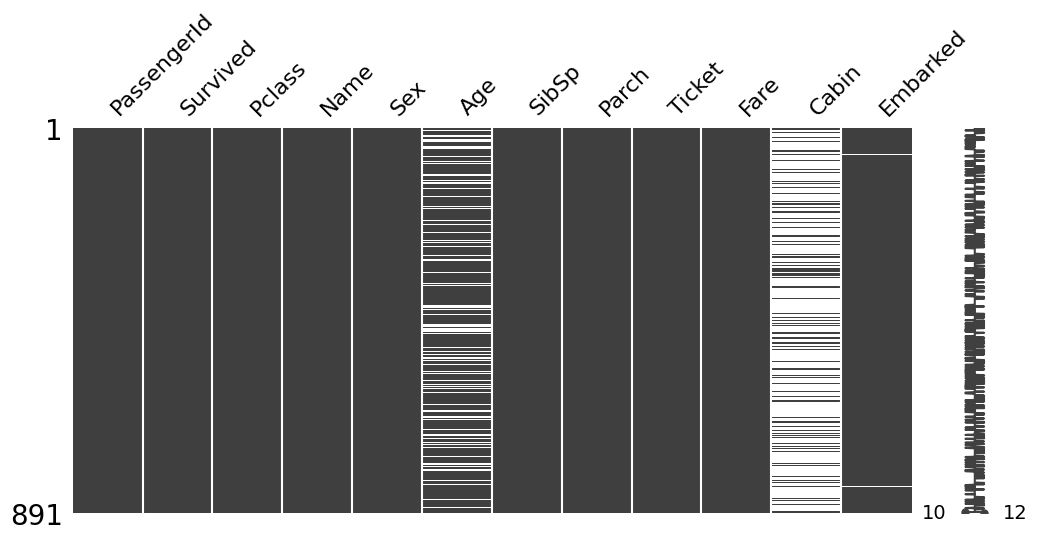

In [9]:
#결측치 시각화
import missingno as msno
msno.matrix(train, figsize=(12, 5))

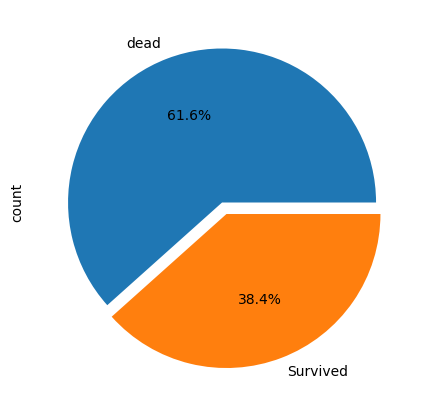

In [10]:
train["Survived"].value_counts()

plt.figure(figsize=(8, 5))
labels = ['dead', 'Survived']
train['Survived'].value_counts().plot.pie(labels=labels,
                                         shadow=False,
                                         autopct='%1.1f%%',
                                         explode=[0, 0.08])
plt.show()

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
train['Sex_clean'] = train['Sex'].astype('category').cat.codes
test['Sex_clean'] = test['Sex'].astype('category').cat.codes

In [14]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Sex_clean        0
dtype: int64

In [15]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [16]:
train['Embarked'].fillna('S', inplace=True)

In [17]:
train['Embarked_clean'] = train['Embarked'].astype('category').cat.codes
test['Embarked_clean'] = test['Embarked'].astype('category').cat.codes

In [18]:
train['family'] = train['SibSp'] + train['Parch'] + 1
test['family'] = test['SibSp'] + test['Parch'] + 1

train['solo'] = (train['family'] == 1)
test['solo'] = (test['family'] == 1)

In [19]:
train['FareBin'] = pd.qcut(train['Fare'], 5)
test['FareBin'] = pd.qcut(test['Fare'], 5)

train['FareBin'].value_counts()

FareBin
(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: count, dtype: int64

In [20]:
train['FareBin_clean'] = train['FareBin'].astype('category').cat.codes
test['FareBin_clean'] = test['FareBin'].astype('category').cat.codes

In [21]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [22]:
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [23]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [24]:
train['Title'] = train['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Countess', 'Capt', 'Sir', 'Lady', 'Don', 'Jonkheer'], 'other')
test['Title'] = test['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Countess', 'Capt', 'Sir', 'Lady', 'Don', 'Jonkheer'], 'other')

In [25]:
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

In [26]:
train['Title'].value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
other      23
Name: count, dtype: int64

In [27]:
test['Title'].value_counts()

Title
Mr        240
Miss       79
Mrs        72
Master     21
other       5
Dona        1
Name: count, dtype: int64

In [28]:
test['Title'] = test['Title'].replace('Dona', 'other')

In [29]:
test['Title'].value_counts()

Title
Mr        240
Miss       79
Mrs        72
Master     21
other       6
Name: count, dtype: int64

In [30]:
train['Title_clean'] = train['Title'].astype('category').cat.codes
test['Title_clean'] = test['Title'].astype('category').cat.codes

In [31]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_clean,Embarked_clean,family,solo,FareBin,FareBin_clean,Title,Title_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,2,False,"(-0.001, 7.854]",0,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,2,False,"(39.688, 512.329]",4,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,1,True,"(7.854, 10.5]",1,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,2,False,"(39.688, 512.329]",4,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2,1,True,"(7.854, 10.5]",1,Mr,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,2,1,True,"(10.5, 21.679]",2,other,4
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,2,1,True,"(21.679, 39.688]",3,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,2,4,False,"(21.679, 39.688]",3,Miss,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,1,True,"(21.679, 39.688]",3,Mr,2


In [32]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=(True))
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=(True))

In [33]:
train.loc[train["Age"] <= 10, "Age_clean"] = 0
train.loc[(train["Age"] > 10) & (train["Age"] <= 15), "Age_clean"] = 1
train.loc[(train["Age"] > 15) & (train["Age"] <= 20), "Age_clean"] = 2
train.loc[(train["Age"] > 20) & (train["Age"] <= 25), "Age_clean"] = 3
train.loc[(train["Age"] > 25) & (train["Age"] <= 30), "Age_clean"] = 4
train.loc[(train["Age"] > 30) & (train["Age"] <= 35), "Age_clean"] = 5
train.loc[(train["Age"] > 35) & (train["Age"] <= 40), "Age_clean"] = 6
train.loc[(train["Age"] > 40) & (train["Age"] <= 45), "Age_clean"] = 7
train.loc[(train["Age"] > 45) & (train["Age"] <= 50), "Age_clean"] = 8
train.loc[(train["Age"] > 50) & (train["Age"] <= 60), "Age_clean"] = 9
train.loc[train["Age"] > 60, "Age_clean"] = 10

test.loc[test["Age"] <= 10, "Age_clean"] = 0
test.loc[(test["Age"] > 10) & (test["Age"] <= 15), "Age_clean"] = 1
test.loc[(test["Age"] > 15) & (test["Age"] <= 20), "Age_clean"] = 2
test.loc[(test["Age"] > 20) & (test["Age"] <= 25), "Age_clean"] = 3
test.loc[(test["Age"] > 25) & (test["Age"] <= 30), "Age_clean"] = 4
test.loc[(test["Age"] > 30) & (test["Age"] <= 35), "Age_clean"] = 5
test.loc[(test["Age"] > 35) & (test["Age"] <= 40), "Age_clean"] = 6
test.loc[(test["Age"] > 40) & (test["Age"] <= 45), "Age_clean"] = 7
test.loc[(test["Age"] > 45) & (test["Age"] <= 50), "Age_clean"] = 8
test.loc[(test["Age"] > 50) & (test["Age"] <= 60), "Age_clean"] = 9
test.loc[test["Age"] > 60, "Age_clean"] = 10



In [34]:
train.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            0
Sex_clean           0
Embarked_clean      0
family              0
solo                0
FareBin             0
FareBin_clean       0
Title               0
Title_clean         0
Age_clean           0
dtype: int64

In [35]:
train['Cabin'].str[:1].value_counts()

Cabin
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [36]:
mapping = {
    'A' : 0,
    'B' : 1,
    'C' : 2,
    'D' : 3,
    'E' : 4,
    'F' : 5,
    'G' : 6,
    'T' : 7
}

train['Cabin_clean'] = train['Cabin'].str[:1]
train['Cabin_clean'] = train['Cabin_clean'].map(mapping)
train['Cabin_clean'] = train.groupby('Pclass')['Cabin_clean'].transform('median')

test['Cabin_clean'] = test['Cabin'].str[:1]
test['Cabin_clean'] = test['Cabin_clean'].map(mapping)
test['Cabin_clean'] = test.groupby('Pclass')['Cabin_clean'].transform('median')

In [37]:
train.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            0
Sex_clean           0
Embarked_clean      0
family              0
solo                0
FareBin             0
FareBin_clean       0
Title               0
Title_clean         0
Age_clean           0
Cabin_clean         0
dtype: int64

In [38]:

feature = [
    'Pclass',
    'SibSp',
    'Parch',
    'Sex_clean',
    'Embarked_clean',
    'family',
    'solo',
    'FareBin_clean',
    'Title_clean',
    'Age_clean',
    'Cabin_clean'
]

label = [
    'Survived'
]

In [39]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

data = train[feature]
target = train[label]

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=0)
cross_val_score(clf, data, target, cv=k_fold, scoring='accuracy', ).mean()

0.8260174781523096

In [40]:
x_train = train[feature]
x_test = test[feature]
y_train = train[label]

clf = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=0)
clf.fit(x_train, y_train)
submission['Survived'] = clf.predict(x_test)
submission.to_csv('titanic-submission.csv', index=False)